In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
with open('rewardwykmb_trainidealisd1000.json') as f:
    rewardtrace = json.load(f)
with open('tmp/rewardepuak_train10000episodes.json') as f:
    qtrace = json.load(f)

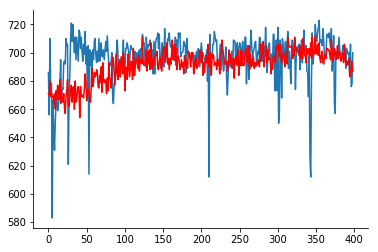

In [3]:
fig, ax = plt.subplots(1)
ax.plot(rewardtrace['data'][1:400], label='deep q learning')
ax.plot(qtrace['data'][1:400], color= 'r', label = 'tabular q learning')
sns.despine()

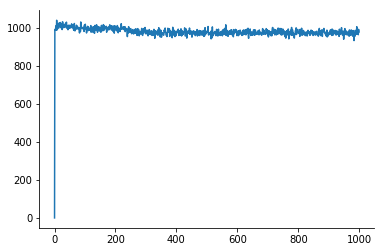

In [3]:
with open('tmp/rewardezrez_downsampled_1kepisodes.json') as f:
    trace = json.load(f)
fig, ax = plt.subplots(1)
ax.plot(trace['data'], label='q learning with time')
sns.despine()

[1360, 1440]


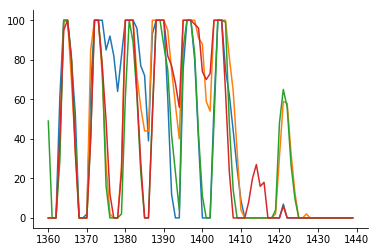

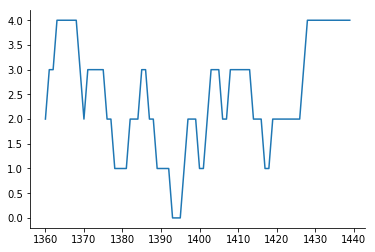

In [8]:
with open('tmp/ezrez_downsampled_1kepisodes.json') as f:
    statetrace = json.load(f)
run=1
startday =170
periods = 8#in three hours 8 periods make a full day
duration =10#days
select = [startday*periods,(startday+duration)*periods]
print(select)
fulldata = statetrace['data'][run]
data = statetrace['data'][run][select[0]:select[1]]
xs = list(range(len(fulldata)))[select[0]:select[1]]
fig, ax = plt.subplots(1)
for sensor in ['S0','S1','S2','S3']:
    ax.plot(xs, [i[sensor][1] for i in data])
sns.despine()
fig, ax = plt.subplots(1)
count_on = lambda d: sum([v[0]!=2 for k,v in d.items()])
ax.plot(xs, [count_on(i) for i in data])
sns.despine()

[15840, 16320]


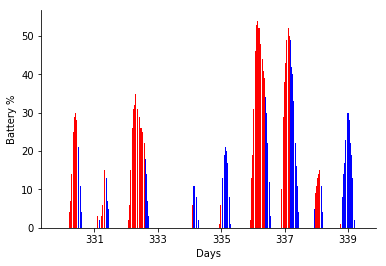

In [18]:
#with open('tmp/dtoei_testingonunseenyear.json') as f:
fig, ax = plt.subplots(1)
def test(i):
    i['S0'][0]==2
def get_plottable(i):
    return i['S0'][1]
sensor = 'S1'
batts = np.array([i[sensor][1] for i in data], dtype=float)
statuses =  np.array([i[sensor][0] for i in data])
onbatts = np.copy(batts)
offbatts = np.copy(batts)
offbatts[statuses!=2] = np.nan
onbatts[statuses==2] = np.nan
ax.bar(xs,onbatts,color='b')
ax.bar(xs,offbatts,color='r')
#ax.plot(offbatts, c='r')
#ax.plot(get_plottable(data))
#ax.set_xlim([0,337])
ax.set_ylabel('Battery %')
ax.set_xticklabels([int(x/48) for x in ax.get_xticks()])
ax.set_xlabel('Days')
ax.set_ylabel('Battery %')
sns.despine()

In [51]:
len(offbatts)

144